In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 한글 폰트
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 그래프 마이너스 폰트 깨지는 문제 대처
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
import sklearn.datasets
import mglearn

# 커널 서포트 벡터 머신(SVM)
- 분류, 회귀 모두 사용 가능
- 저차원, 고차원 데이터에 모두 잘 작동
- **직선과 초평면은 유연하지 못하여, 저차원 데이터셋에서는 선형모델이 매우 제한적임**
- 선형 모델을 유연하게 만드는 방법은 특성끼리 곱하거나 특성을 거듭제곱하는 식으로 **새로운 특성을 추가하는 것**
    - 비선형 특성 추가  
- **매개변수 설정과 데이터 스케일에 매우 민감 (특히 입력 특성의 범위가 비슷해야함)**
- 샘플이 많을 때는 잘 맞지 않음
    - 약 100,000 이상의 데이터셋에서는 속도, 메모리 관점에서 도전적인 과제
- 분석, 설명하기 어려움

## 저차원 data set에서의 SVM

Text(0, 0.5, '특성 1')

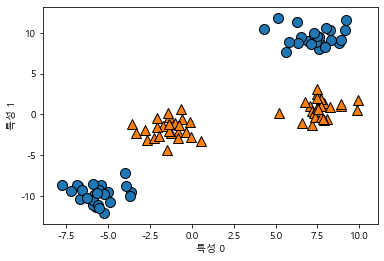

In [3]:
# 선형적으로 구분이되지 않는 클래스를 가진 이진 분류 data set
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0, 0.5, '특성 1')

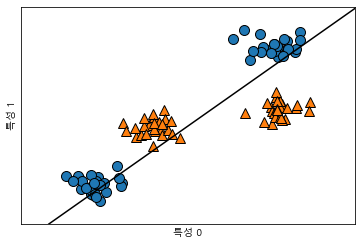

In [4]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서, 이런 데이터 셋에는 잘 안맞음

## 특성을 제곱해서 3차원(고차원) data set 

Text(0.5, 0, '특성 1**2')

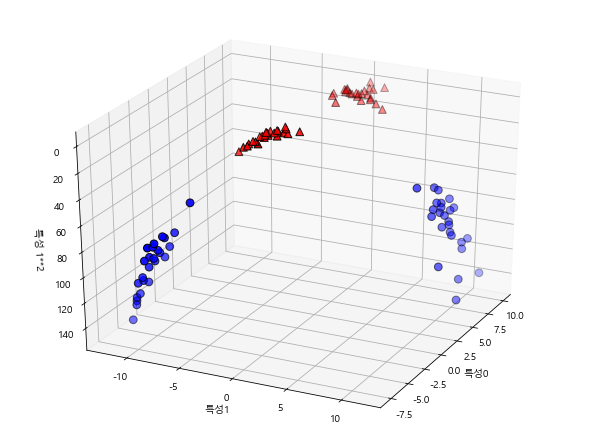

In [5]:
# 두 번째 특성을 제곱하여, 새로운 특성으로 추가 -> 특성 확장
# (특성0, 특성1) -> (특성0, 특성1, 특성1**2) => 3차원 데이터
X_new = np.hstack([X, X[:, 1:]**2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure(figsize=(8,6))

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0 인 포인트를 먼저 그리고, 그 다음 y == 1인 포인트 그리기
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성 1**2')

- 새로운 X_new data set에서 선형 모델과 3차원 공간의 평면을 사용해 두 클래스 구분 가능

C:\Users\qkrwl\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Text(0.5, 0, '특성 1**2')

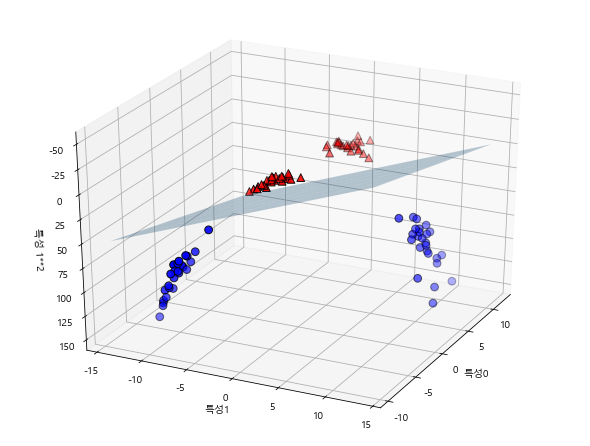

In [6]:
# 두 번째 특성을 제곱하여, 새로운 특성으로 추가 -> 특성 확장
# (특성0, 특성1) -> (특성0, 특성1, 특성1**2) => 3차원 데이터
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure(figsize=(8,6))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() -2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() -2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY +intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel('특성0')
ax.set_ylabel('특성1')
ax.set_zlabel('특성 1**2')

Text(0, 0.5, '특성 1')

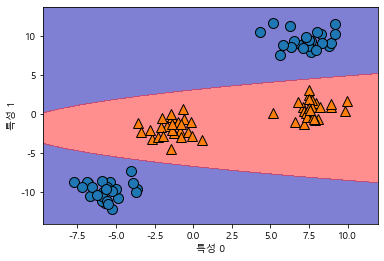

In [7]:
# 원래 특성으로 투영
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 원래 특성으로 투영하니, 선형 즉 직선보다 타원에 가까운 결정 경계를 보임

## 커널 기법
- 실제로 특성을 많이 추가하면 연산 비용이 커짐
- 커널기법을 사용해 새로운 특성을 많이 만들지 않고서도 고차원에서 분류기 학습가능
    - 실제로 데이터를 확장하지 않고, 확장된 특성에 대한 데이터 포인트들의 거리(스칼라곱)를 계산
    - 하지만, 특성의 중요도는 고차항이 될 수록 줄어듬
- 일반적으로 두 클래스 사이의 경계에 위치한 **서포트 벡터(support vector)만 결정 경계를 만드는 데 영향을 줌**

고차원 공간 매핑 2가지 방법
- 다항식 커널: 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산
- 가우시안(Gaussian) 커널 (RBF 커널, Radial Basis Function): 차원이 무한한 특성 공간에 매핑하는 것
    - 모든 차수의 모든 다항식을 고려한다고 이해

Text(0, 0.5, '특성 1')

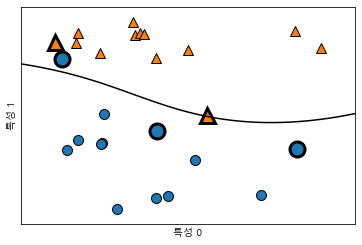

In [8]:
# forge data set
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()

svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)    # RBF(가우시안 커널) 사용

mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됨
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel('특성 0')
plt.ylabel('특성 1')

- 굵은 테두리로 표현된 point가 서포트 벡터
- 부드럽고 비선형 적인 경계 생성됨

## SVM 매개변수 튜닝
- gamma: 가우시안 커널 공식의 감마로 가우시안 커널 폭의 **역수**에 해당
    - 하나의 훈련 샘플이 미치는 영향의 범위를 결정
        - 1 ~ 0 사이 값을 가짐 
        - 기본값 gamma = 'scale'  (1/X_train.shape[1]*X_train.std()) <- 특성 개수 스케일의 역수
        - 작은 값: 데이터 포인트의 영향 범위가 커짐(모델의 복잡도를 낮춤)
        - 큰 값: 영향이 미치는 범위가 제한적
- C: 규제 매개변수. 각 포인트의 중요도(dual_coef_ 값)를 제한함
    - 선형 모델에서 사용한 것과 비슷한 규제 매개변수
    - 기본값 C=1
    - 작은 C는 제약이 큰 모델을 만들고, 각 데이터 포인트의 영향력이 작음 
- 둘다 모델의 복잡도를 조정하며, 둘다 값을 크게하면 복잡한 모델을  만듬
    - 과소적합되었을 때는 값이 커지게하면됨

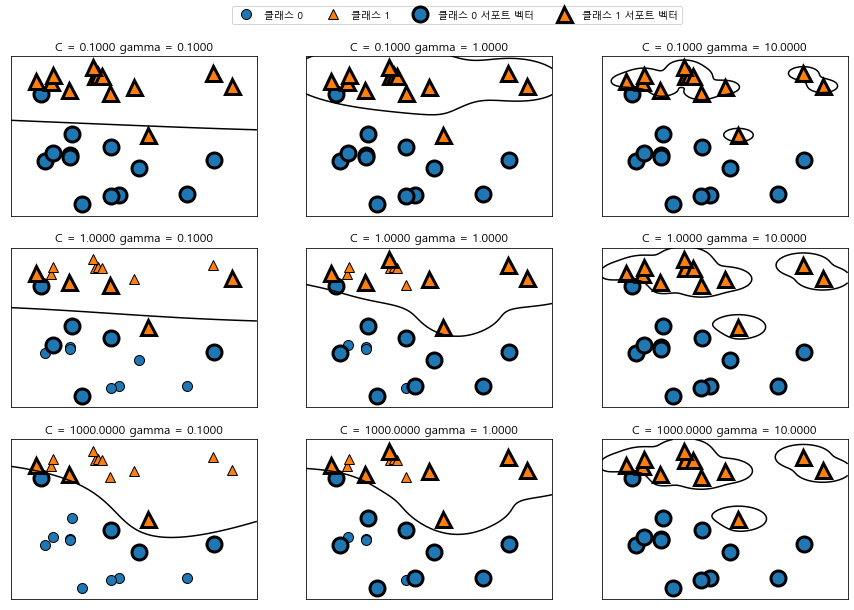

In [9]:
# C, gamma 변화에 따른 결과
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(['클래스 0','클래스 1','클래스 0 서포트 벡터', '클래스 1 서포트 벡터'], ncol=4, loc=(.9, 1.2))

- 왼->오 gamma 값 커짐 => 커널의 반경이 큼 -> 작아짐으로써 결정 경계는 하나의 포인트에 더 민감해짐
- 위 -> 아래 C 값 커짐 => 규제 큼(각 데이터 포인트의 영향력이 작음) -> 작아짐

In [12]:
# RBF 커널 svm # cancer data set
# C, gamma 기본값 사용
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print('훈련 세트 정확도: {:.2f}'.format(svc.score(X_train, y_train)))
print('테스트 세트 정확도: {:.2f}'.format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


- sklearn 0.22 version부터는 gamma 매개변수의 기본값이 'auto'(특성 개수의 역수) -> 'scaled'(특성 개수 스케일이 조정된 역수)로 변경되어, 성능이 책처럼 안좋지는 않음

Text(0, 0.5, '특성 크기')

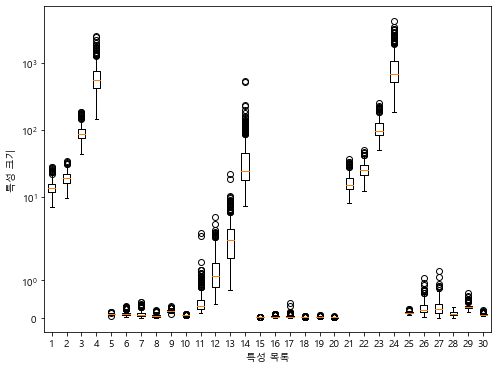

In [18]:
# 각 특성의 min, max 값을 log scale로 나타내보자
plt.figure(figsize=(8,6))
plt.boxplot(X_train)  # manage_xticks=False
plt.yscale('symlog')
plt.xlabel('특성 목록')
plt.ylabel('특성 크기')

- 특성 자릿수가 각각 너무 다름 -> 커널 svm에는 영향이 아주 큼

## SVM을 위한 데이터 전처리
- 특성 값의 범위가 비슷해지도록 조정
- svm에서는 2가지 방법 많이 사용
    1. 모든 특성 값을 평균이 0이고, 단위 분산이 되도록 (StandardScaler)
    2. 0 ~ 1 사이로 맞추는 방법 (MinMaxScaler)

### MinMaxScaler 직접 구현 및 처리

In [20]:
# train set 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# train set 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# train set에 최솟값을 빼고 범위로 나누면, 각 특성에 대해 최솟값은 0 최댓값은 1
X_train_scaled = (X_train - min_on_training) / range_on_training
print('특성별 최솟값\n', X_train_scaled.min(axis=0))
print('특성별 최댓값\n', X_train_scaled.max(axis=0))

특성별 최솟값
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
특성별 최댓값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [21]:
# test set 에도 같은 작업 적용하지만, **train set에서 계산한 최솟값과 범위를 사용!**
X_test_scaled = (X_test - min_on_training) / range_on_training

In [22]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


- train, test 성능이 매우 비슷 -> 과소적합된 상태  => C or gamma 매개변수 값을 증가시켜 좀 더 복잡한 모델 만들 수 있음

In [34]:
# 좀 더 복잡한 모델로
svc = SVC(C=50)   # C=1000 하면 더 낮아짐(과대적합)
svc.fit(X_train_scaled, y_train)

print('훈련 세트 정확도: {:.3f}'.format(svc.score(X_train_scaled, y_train)))
print('테스트 세트 정확도: {:.3f}'.format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.995
테스트 세트 정확도: 0.979
